
******************************菜单******************************
        1 读取数据集,处理数据
        2 绘制散点图
        3 按第三项的价值:重量比非递增排序
        4 自主选择动态规划法或回溯法，并写入txt文件
        5 退出
****************************************************************
    
请选择:1
请输入要读取的数据集:idkp/sdkp/udkp/wdkp
sdkp
请输入要读取哪一组数据:1-10
1
物品总数:300
背包容量:60143
价值为:[125, 821, 946, 359, 987, 1346, 258, 763, 1021, 107, 622, 729, 474, 744, 1218, 150, 490, 640, 260, 497, 757, 225, 490, 715, 563, 658, 1221, 1003, 1007, 2010, 341, 594, 935, 316, 441, 757, 653, 898, 1551, 243, 817, 1060, 457, 895, 1352, 709, 852, 1561, 561, 604, 1165, 348, 511, 859, 541, 915, 1456, 156, 1067, 1223, 666, 777, 1443, 799, 972, 1771, 572, 807, 1379, 1015, 1055, 2070, 531, 745, 1276, 567, 638, 1205, 280, 966, 1246, 608, 864, 1472, 483, 1095, 1578, 172, 534, 706, 693, 1040, 1733, 162, 990, 1152, 645, 1029, 1674, 522, 991, 1513, 942, 958, 1900, 270, 323, 593, 252, 563, 815, 192, 999, 1191, 831, 856, 1687, 326, 389, 715, 200, 275, 475, 365, 761, 1126, 357

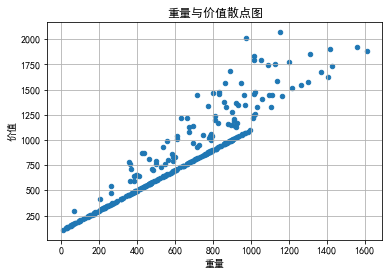


******************************菜单******************************
        1 读取数据集,处理数据
        2 绘制散点图
        3 按第三项的价值:重量比非递增排序
        4 自主选择动态规划法或回溯法，并写入txt文件
        5 退出
****************************************************************
    
请选择:3
    first_profit  scecond_profit  third_profit  first_weight  scecond_weight  \
72           129             161           290            29              61   
48           331             454           785           231             354   
65           201             342           543           101             242   
11           316             441           757           216             341   
9           1003            1007          2010           903             907   
..           ...             ...           ...           ...             ...   
30           693            1040          1733           593             940   
19           156            1067          1223            56             967   
64           326             9

In [1]:
#软件工程实验二
#---------------------------------------导入必要的包，定义所需的函数---------------------------------------
#导入时间包，便于记录动态规划法和回溯法所用时间
import time
#导入pandas，需使用dataframe类型
import pandas as pd
#导入可视化包,用于绘制散点图
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
# 用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']
# 用来正常显示负号
plt.rcParams['axes.unicode_minus'] = False  

#函数fun1去除一维列表one_list中的空项，返回无空项的一维列表
def fun1(one_list): 
    return [i for i in one_list if(len(str(i))!=0)]

#函数fun2将一个长度为n的一维列表的项进行划分 ，每个子列表中包含m个项，返回n/m行，m列的二维列表
def fun2(one_list,m=6):  
    return [one_list[i:i+m] for i in range(len(one_list)) if i%m==0]

#函数fun3将一个字符串中遇到的所有符号替换为空格，再将由空格分隔的几个值的序列（str类型）转化为列表，调用函数fun1去除一维列表one_list中的空项，返回处理后的列表
def fun3(one_str):
    one_str = one_str.replace(","," ").replace("."," ").replace("="," ").replace("*"," ")
    one_str = one_str.split(" ")
    one_str = fun1(one_str)
    return one_str

#动态规划法
def backpack(n, c, w, v):
    #初始化二维数组，用于记录背包中个数为i，重量为j时能获得的最大价值
    result = [[0 for i in range(c+1)] for i in range(n+1)]
    #循环将数组进行填充
    for i in range(1, n+1):
        for j in range(1, c+1):
            if j < w[i-1]:
                result[i][j] = result[i-1][j]
            else:
                result[i][j] = max(result[i-1][j], result[i-1][j-w[i-1]] + v[i-1])
    return result

#回溯法
def backtrack(i):
    global bestV,curW,curV
    if i>=n:
        if bestV<curV:
            bestV=curV
    else:
        if curW+w[i]<=c:
            curW+=w[i]
            curV+=v[i]
            backtrack(i+1)
            curW-=w[i]
            curV-=v[i]
        backtrack(i+1)


#---------------------------------------读取数据,处理数据---------------------------------------
#读取数据集,处理数据
def Read_data():
    x=input("请输入要读取的数据集:idkp/sdkp/udkp/wdkp\n")
    file = open(r""+x+"1-10.txt",mode='r')
    content = file.read()
    #去除content中的换行符
    content = content.split("\n")
    #调用fun1去除列表content中的空项
    content = fun1(content)
    #去除new_content中的首尾项
    content = content[1:-1]
    #调用fun2将数据分块
    content=fun2(content,m=6)
    #将二维列表转换为DataFrame
    df = pd.DataFrame(content)
    #获取第x行第1列的值,此时是str类型
    x=input("请输入要读取哪一组数据:1-10\n")
    x=int(x)-1
    KP = df.loc[x,1]
    #调用fun3处理字符串KP
    KP = fun3(KP)
    #从字符串KP中准备提取出物品总数amount
    global amount
    amount = int(KP[4])*int(KP[5])
    print("物品总数:" + str(amount))
    #从字符串KP中准备提取出背包容量cubage
    global cubage
    cubage = int(KP[-1])
    print("背包容量:" + str(cubage))
    #提取出profit值
    #获取第x行第3列的profit的值,此时是str类型
    profit = df.loc[x,3]
    #调用fun3处理字符串profit
    profit = fun3(profit)
    #提取出weight值
    #获取第x行第5列的weight的值,此时是str类型
    weight = df.loc[x,5]
    #调用fun3处理字符串weight
    weight = fun3(weight)
    #将列表元素profit,weight类型由object转换为int64
    global profit_int
    profit_int = list(map(int, profit)) #profit = [int(i) for i in profit]同
    print("价值为:"+str(profit_int))
    global weight_int
    weight_int = list(map(int, weight)) #weight = [int(i) for i in weight]同
    print("重量为:"+str(weight_int))

#---------------------------------------绘制散点图---------------------------------------
#绘制散点图
def Scatter():
    #将两个列表合并为dataframe类型，便于绘制散点图
    #List转DataFrame
    global profit_weight
    profit_weight = pd.DataFrame(profit_int, columns=['profit'])
    #多个List合并成一个DataFrame
    profit_weight = pd.concat([profit_weight, pd.DataFrame(weight_int,columns=['weight'])],axis=1)
    #绘制散点图
    profit_weight.plot(x='weight',y='profit',kind='scatter')
    #x坐标轴文本
    plt.xlabel('重量')
    #y坐标轴文本
    plt.ylabel('价值')
    #图片标题
    plt.title('重量与价值散点图')
    #显示网格
    plt.grid(True)
    #显示图形
    plt.show()

#---------------------------------------第三项的价值:重量比非递增排序---------------------------------------
#按第三项的价值:重量比非递增排序
def Descending_sort():
#调用fun2将列表项三项为一项子列表项
    profit_list=fun2(profit_int,m=3)
    weight_list=fun2(weight_int,m=3)
    #将二维列表profit_list转换为DataFrame
    profit_df = pd.DataFrame(profit_list)
    #将二维列表weight_list转换为DataFrame
    weight_df = pd.DataFrame(weight_list)
    #将两个dataframe合并为一个dataframe
    profit_weight_df = pd.concat([profit_df,weight_df],axis=1)
    profit_weight_df.columns=['first_profit','scecond_profit','third_profit','first_weight','scecond_weight','third_weight']
    #计算项集第三项的价值:重量比
    third_profit_weight = profit_weight_df["third_profit"]/profit_weight_df["third_weight"]
    #将第三项的价值:重量比插入dataframe
    profit_weight_df.insert(6,"third_profit_weight",third_profit_weight)
    #非递增排序
    profit_weight_df.sort_values(by = ['third_profit_weight'],ascending = False,inplace=True)
    print(profit_weight_df)
    
#---------------------------------------自主选择动态规划法或回溯法，并写入txt文件---------------------------------------
#自主选择动态规划法或回溯法，并写入txt文件
def Solve_write_data():
    choice = input('''请选择：动态规划法------1\n
        回溯法----------2\n''')
    if choice == '1':
        start = time.time()
        result = backpack(amount, cubage, weight_int, profit_int)
        end = time.time()
        print("最优解为：" + str(result[amount][cubage]) + "\n")
        print("共耗时:" + str(end - start) + " s")
        #写入txt文件
        output_file = open(r"Dynamic_KnapSack_output.txt",mode='w')
        output_file = output_file.write("最优解为：" + str(result[amount][cubage]) + "\n" + "共耗时:" + str(end - start) + " s")
    elif choice == '2':
        n = amount
        c = cubage
        w = weight_int
        v = profit_int
        start = time.time()
        backtrack(0)
        end = time.time()
        print("最优解为：" + str(bestV)+ "\n")
        print("共耗时:" + str(end - start) + " s")
        #写入txt文件
        output_file = open(r"Back_KnapSack_output.txt",mode='w')
        output_file = output_file.write("最优解为：" + str(bestV) + "\n" + "共耗时:" + str(end - start) + " s")
    else:
        print("无此项选择")

#---------------------------------------main()函数---------------------------------------
def main():
    while(True):
        menu()
        option = input("请选择:")
        if option == '1':
            Read_data()
        elif option == '2':
            Scatter()
        elif option == '3': 
            Descending_sort()
        elif option == '4': 
            Solve_write_data()
        else:
            print("退出!")
            break

#---------------------------------------菜单---------------------------------------
def menu():
    print('''
******************************菜单******************************
        1 读取数据集,处理数据
        2 绘制散点图
        3 按第三项的价值:重量比非递增排序
        4 自主选择动态规划法或回溯法，并写入txt文件
        5 退出
****************************************************************
    ''')
#---------------------------------------程序入口---------------------------------------
main()